In [1]:
# PROBLEM STATEMENT -

# Lending Club is a consumer finance company which is the largest online loan marketplace, facilitating personal loans, business loans etc.
# When the company receives a loan application, the decision for loan approval has to be made by the comapny,based on the applicant’s profile.
# case1 - Applicant likely to repay the loan. If loan not approved, Loss of bussiness for the company
# case2 - Applicant not likely to repay the loan ( "Risky applicants"). If loan approved, financial loss ( called credit loss) for the company
# Note - customers labelled as ‘charged-off’ are the ‘defaulters’

# The objective here is to use Exploratory Data Analysis (EDA) to identify the driver variables(variables which are strong indicators of default)
# such that these insights can be used in making decisons for approval or rejection of loans by the Lending company to reduce its credit loss.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

#### 1. Reading the dataset

In [3]:
# reading the input file
data = pd.read_csv("loan.csv")

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [6]:
data.shape # gives the rows and columns count

(39717, 111)

In [7]:
data.info() # fetching the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### 2. Data Handling and Cleaning

#### 2.1. Handling Null values. Drop columns which has all Nulls.

In [9]:
data = data.dropna( axis=1, how='all') 

In [10]:
data.shape # Total there were 111 columns, after dropping we have 57 columns

(39717, 57)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
data.isnull().sum()*100/data.shape[0]  # Check for percentage of missing values

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


##### 2.2. Dropping columns which has high percentage of missing values( > 50%).

In [13]:
# dropping mths_since_last_delinq 64.66 % of missing values
data = data.drop('mths_since_last_delinq', axis = 1) 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
# dropping mths_since_last_record 92.98 % of missing values
data = data.drop('mths_since_last_record', axis = 1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# dropping next_pymnt_d  97.12 % of missing values
data = data.drop('next_pymnt_d', axis = 1)

In [18]:
data.shape

(39717, 54)

In [19]:
data.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

##### 2.3. Dropping data which has Loan status = 'Current' because these applicants are in the process of paying the loan. 

In [20]:
#Checking the loan_status field as this is the key column to identify the customers loan repayment history.
data['loan_status'].value_counts() 

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [21]:
#From the above data,
# Fully Paid     32950
# Charged Off     5627
# Current         1140
# From the data above we see "Current" customers are in the process of paying installment and hence cannot be labelled as defaulters.
# So we can remove the records from loan_status with the value 'Current'.
data = data[data['loan_status']!='Current']

In [22]:
data.shape

(38577, 54)

#### 2.4.Dropping Columns with the mostly zero values

In [23]:
# Checking columns which has zero values
zero_counts = (data == 0).sum()

In [24]:
zero_counts

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                 129
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                              0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                             178
delinq_2yrs                   34386
earliest_cr_line                  0
inq_last_6mths              

In [25]:
# Find the columns with the most(greater than 34000) zero values
max_zero_columns = zero_counts[zero_counts > 34000].index
max_zero_columns

Index(['delinq_2yrs', 'pub_rec', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [26]:
# Dropping columns which has zeroes more than 34000
data = data.drop(max_zero_columns, axis = 1)


In [27]:
# After dropping columns with more number of zeroes, we get 41 columns
data.shape

(38577, 41)

#### 2.5.Dropping Columns which have non-relevant data 

In [28]:
# Dropping columns which are irrelevant 
data = data.drop(['url','desc','title','zip_code','addr_state'], axis = 1)

In [29]:
data.shape

(38577, 36)

#### 2.6.Dropping rows for columns which have very few null values

In [30]:
# removing records which has null values in the column emp_title, emp_length, revol_util, last_pymnt_d
data = data[-data.emp_title.isnull()]

In [31]:
data.shape

(36191, 36)

In [32]:
# removing records which has null values in the column emp_length
data = data[-data.emp_length.isnull()]

In [33]:
data.shape

(36136, 36)

In [34]:
# removing records which has null values in the column revol_util
data  = data.dropna(subset=['revol_util'])

In [35]:
data.shape

(36090, 36)

In [36]:
# removing records which has null values in the column last_pymnt_d
data  = data.dropna(subset=['last_pymnt_d'])


In [37]:
data.shape

(36030, 36)

In [38]:
data.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
policy_code            0
application_type       0
dtype: int64

In [39]:
# Post loan considerations: earliest_cr_line, pymnt_plan 

#### 2.7. Checking and Removing Outliers in data


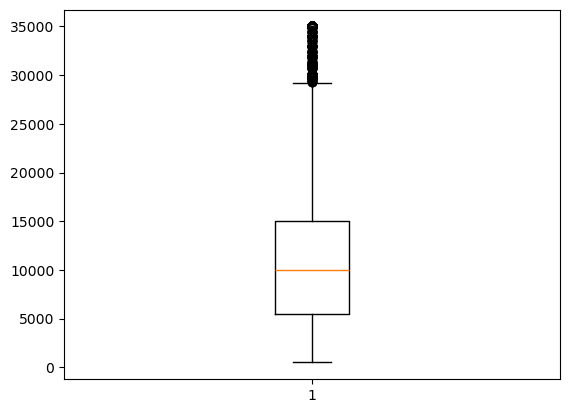

In [40]:
# Checking for outliers for the loan amount.
plt.boxplot(data.loan_amnt)
plt.show()
# There are no outliers because max loan amout and upper fence are closure.

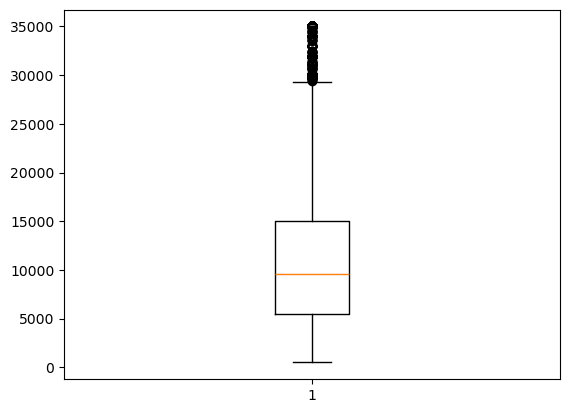

In [41]:
# Checking for outliers for the funded amount.
plt.boxplot(data.funded_amnt)
plt.show()


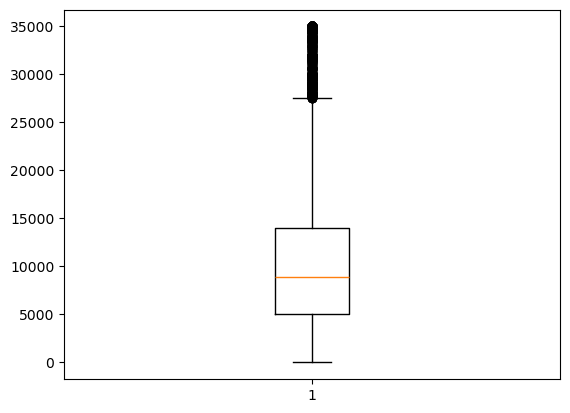

In [42]:
# Checking for outliers for the funded amount by investors.
plt.boxplot(data.funded_amnt_inv)
plt.show()


In [43]:
data['loan_amnt'].describe()

count    36030.000000
mean     11114.868859
std       7311.338857
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [44]:
data['funded_amnt'].describe()

count    36030.000000
mean     10850.535665
std       7057.290430
min        500.000000
25%       5450.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

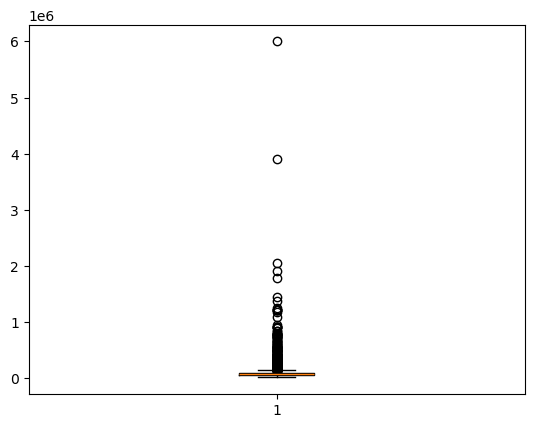

In [45]:
# Checking for outliers for the income  (annual_inc).
plt.boxplot(data.annual_inc)
plt.show()

In [46]:
data['annual_inc'].describe()

count    3.603000e+04
mean     6.909765e+04
std      6.465785e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.230725e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Removing the outliers in the annual income

In [47]:
# IQR : Inter Quartile Range for annual income field
q3, q1 = np.percentile(data.annual_inc , [75, 25])
iqr = q3 - q1
iqr

41303.25

In [48]:
# Lower fence
lower_fence = q1-1.5*iqr 

In [49]:
lower_fence

-20950.875

In [50]:
#upper fence
upper_fence = q3 +1.5*iqr

In [51]:
upper_fence

144262.125

In [52]:
new_data = data[(data['annual_inc'] >= lower_fence) & (data['annual_inc'] <= upper_fence)]



In [53]:
new_data.shape

(34376, 36)

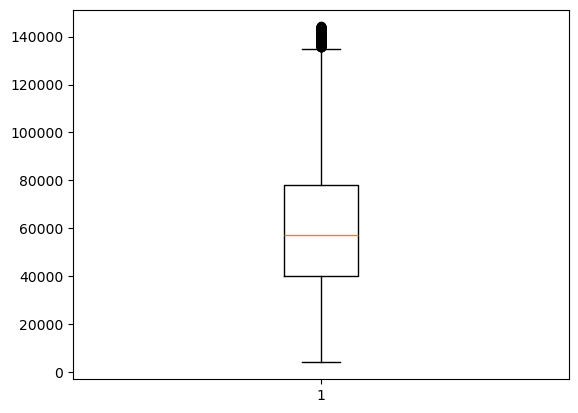

In [54]:
# Ploting box plot for fenced annual_income.
plt.boxplot(new_data['annual_inc'])
plt.show()

#### 2.8.Dropping columns which have only one single unique value 


In [55]:
#identifying the unique values in each column
new_data.nunique()

id                     34376
member_id              34376
loan_amnt                842
funded_amnt              978
funded_amnt_inv         7229
term                       2
int_rate                 367
installment            14026
grade                      7
sub_grade                 35
emp_title              26775
emp_length                11
home_ownership             5
annual_inc              4508
verification_status        3
issue_d                   55
loan_status                2
pymnt_plan                 1
purpose                   14
dti                     2837
earliest_cr_line         504
inq_last_6mths             9
open_acc                  40
revol_bal              19629
revol_util              1078
total_acc                 80
initial_list_status        1
total_pymnt            32841
total_pymnt_inv        32559
total_rec_prncp         6104
total_rec_int          30651
last_pymnt_d             101
last_pymnt_amnt        31100
last_credit_pull_d       105
policy_code   

In [56]:
# dropping columns which has only 1 unique value (pymnt_plan = n , application_type = INDIVIDUAL,  policy_code =1, initial_list_status =f )
new_data = new_data.drop(['pymnt_plan','application_type','policy_code','initial_list_status'], axis = 1)

In [57]:
new_data.shape

(34376, 32)

#### 3. Converting each fields to appropriate Data types

In [58]:
# Converting 'term' from object type to string type
new_data['term'] = new_data['term'].astype(str)

In [59]:
# Converting 'term' from object type to string type
new_data['int_rate'] = new_data['int_rate'].astype(str)

In [60]:
# Replacing % with "" in int-rate field
new_data['int_rate'] = new_data['int_rate'].str.replace('%','')

In [61]:
new_data['int_rate'] = new_data['int_rate'].astype(float)

In [62]:
# Converting 'grade' from object type to string type
new_data['grade'] = new_data['grade'].astype(str)

In [63]:
# Converting 'grade' from object type to string type
new_data['sub_grade'] = new_data['sub_grade'].astype(str)

In [64]:
# Converting ["revol_util"] to string type
new_data['revol_util'] = new_data['revol_util'].astype(str)

In [65]:
# Replacing % with "" in int-rate field
new_data['revol_util'] = new_data['revol_util'].str.replace('%','')

In [66]:
# Converting ["emp_length"] to string type
new_data['emp_length'] = new_data['emp_length'].astype(str)

In [67]:
# Reseting the index of data withut adding previous index as a column
new_data = new_data.reset_index(drop='true')


#### 4. Deriving metrices

In [68]:
#new_data['tenure'] = new_data['emp_length'].apply(
#    lambda x: 0 if '<' in x else 
#              10 if '+' in x else 
#              int(x.split()[0]))

# Replacing values in column 'emp_length' with '<1 year' with 0, and '10+years' with 10 , and in all other values removing 'years' 
new_data['tenure'] = new_data['emp_length'].apply(lambda x: 0 if '<' in x else (10 if '+' in x else x[0]))
new_data['tenure']

print(new_data['tenure'])

0         0
1        10
2         3
3         8
4         9
         ..
34371     1
34372     5
34373     4
34374     3
34375     0
Name: tenure, Length: 34376, dtype: object


In [69]:
# Deriving year and month from issue_d field
new_data['issue_d_year']=pd.to_datetime(new_data.issue_d,format='%b-%y').dt.year
new_data['issue_d_month']=pd.to_datetime(new_data.issue_d,format='%b-%y').dt.month


#### 5.Segmentation of data (1. Numeric, 2. Categorical (Ordered and Unordered)).

In [70]:
# Numeric fields - loan_amnt, funded_amnt,funded_amnt_inv,int_rate,
# Categorical -  term,grade, sub_grade
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","annual_inc","dti","open_acc","revol_bal","revol_util","total_acc","total_pymnt",
          "total_pymnt_inv","total_rec_int"]
cat_cols=["term","grade","sub_grade","home_ownership","issue_d","issue_d_year","issue_d_month","verification_statu","loan_status","purpose","emp_length"]
extra_cols=["id","member_id","emp_title","earliest_cr_line","inq_last_6mths","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]


In [71]:
# Creating a data set of only defaulters data 

new_data_defaulters = new_data[new_data['loan_status']== 'Charged Off']

#### 6. Univariate Analysis

#### 6.1. Categorical Variables - ordered and unordered

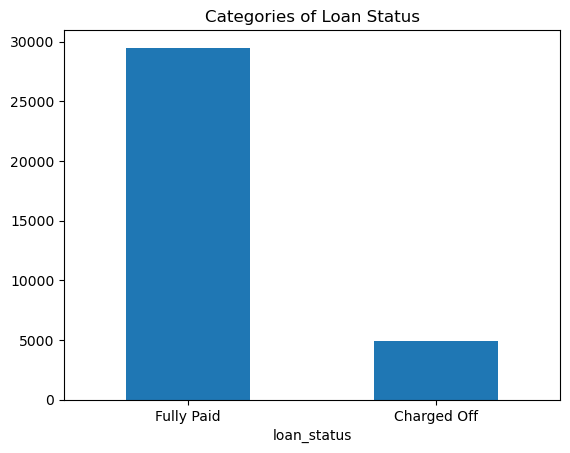

In [72]:
#Plotting bar chart to see the customers count with charged off and fully paid loan amount.
new_data['loan_status'].value_counts().plot.bar()
plt.title("Categories of Loan Status")
plt.xticks(rotation=0)
plt.show()

##### From the above bar chart on loan status we observe that :
##### Observation - There are very few defaulters compared to no-defaulters among the loan applicants 
##### Customers with Charged off (Defaulters) are less than 5000 i.e., ~ 15 %.
##### Customers with Fully paid (Non-defaulters) are about 3000 i.e., ~ 85 %.

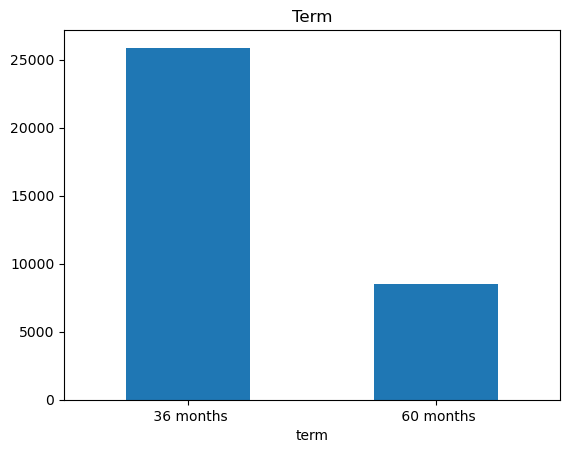

In [73]:
#Plotting bar chart to see the customers count with charged off and fully paid loan amount.
new_data['term'].value_counts().plot.bar()
plt.title("Term")
plt.xticks(rotation=0)
plt.show()

##### From the above bar chart on term category we observe that :
##### 1. More than 50% of loan applicants have opted for 36 months term compared to 60 months term.

In [74]:
# Calculating the percentages of Grades.
round(new_data.grade.value_counts()/sum(new_data.grade.value_counts())*100,2)

grade
B    30.34
A    25.99
C    20.51
D    13.27
E     6.73
F     2.43
G     0.73
Name: count, dtype: float64

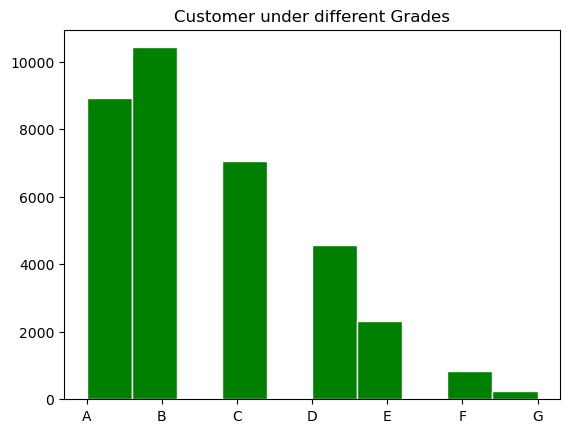

In [75]:
#Plotting bar chart to see the customers with different grades.

plt.hist(new_data.grade.sort_values(), color='green',edgecolor='white')
plt.title("Customer under different Grades")
plt.show()
        

cat_cols=["term","grade","sub_grade","home_ownership","issue_d","issue_d_year","issue_d_month","verification_status","loan_status","purpose"]

##### Observation - Higher number of the loan applicants are from Grade A & B

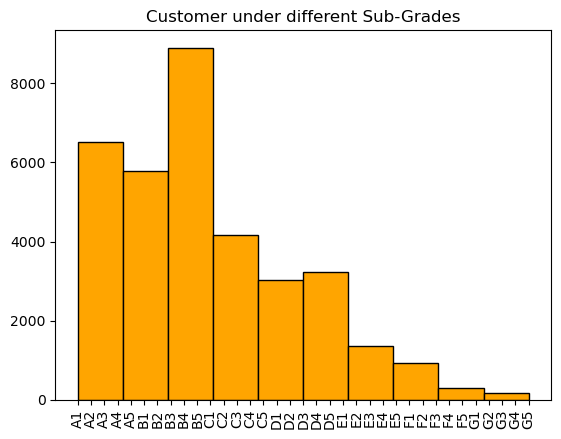

In [76]:
#Plotting bar chart to see the customers with different sub-grades.
plt.hist(new_data.sub_grade.sort_values(), color='orange',edgecolor='black')
# Rotate x-axis labels to vertical
plt.xticks(rotation=90)
plt.title("Customer under different Sub-Grades")
plt.show()

##### From the above hist chart on Grade category we observe that, We have customer in different grades as :
##### Observation - Majority of the loan applicants are from Grade B sub categories [B3,B4,B5]
##### B-30.34%,- 25.9%, -  20.%, 1-   13%, 2-    %, .-    %, 2-G   %   0.73.730161

In [77]:
new_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

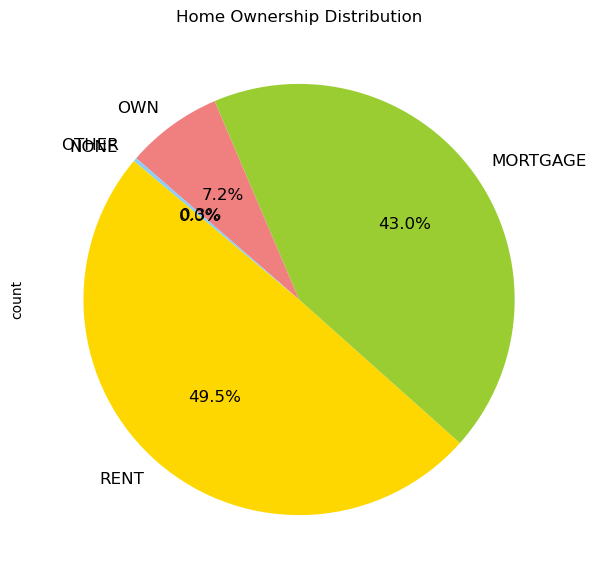

In [78]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Add legend outside the pie chart

plt.figure(figsize=(7, 7))
new_data['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=colors,
                                                   textprops={'fontsize': 12, 'color': 'black'},
                                                  )  # Customize font size and color)
plt.title('Home Ownership Distribution')
plt.xticks(rotation=65)
plt.show()

##### From above pie chart for home ownership data shows :
##### Observation - Maximum loan applicants have rented property (dont have own house) followed my mortgaged property

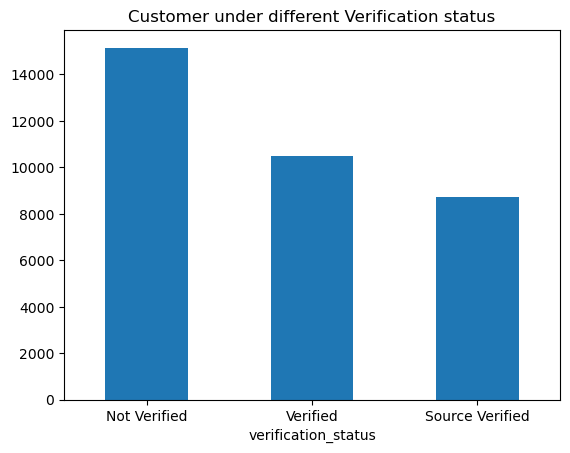

In [79]:
#Plotting bar chart to see the customers with different verification_status.
new_data['verification_status'].value_counts().plot.bar()
plt.title("Customer under different Verification status")
plt.xticks(rotation=0)
plt.show()

##### Observation - Majority of loan applicants are not verified 

Text(0, 0.5, 'Count')

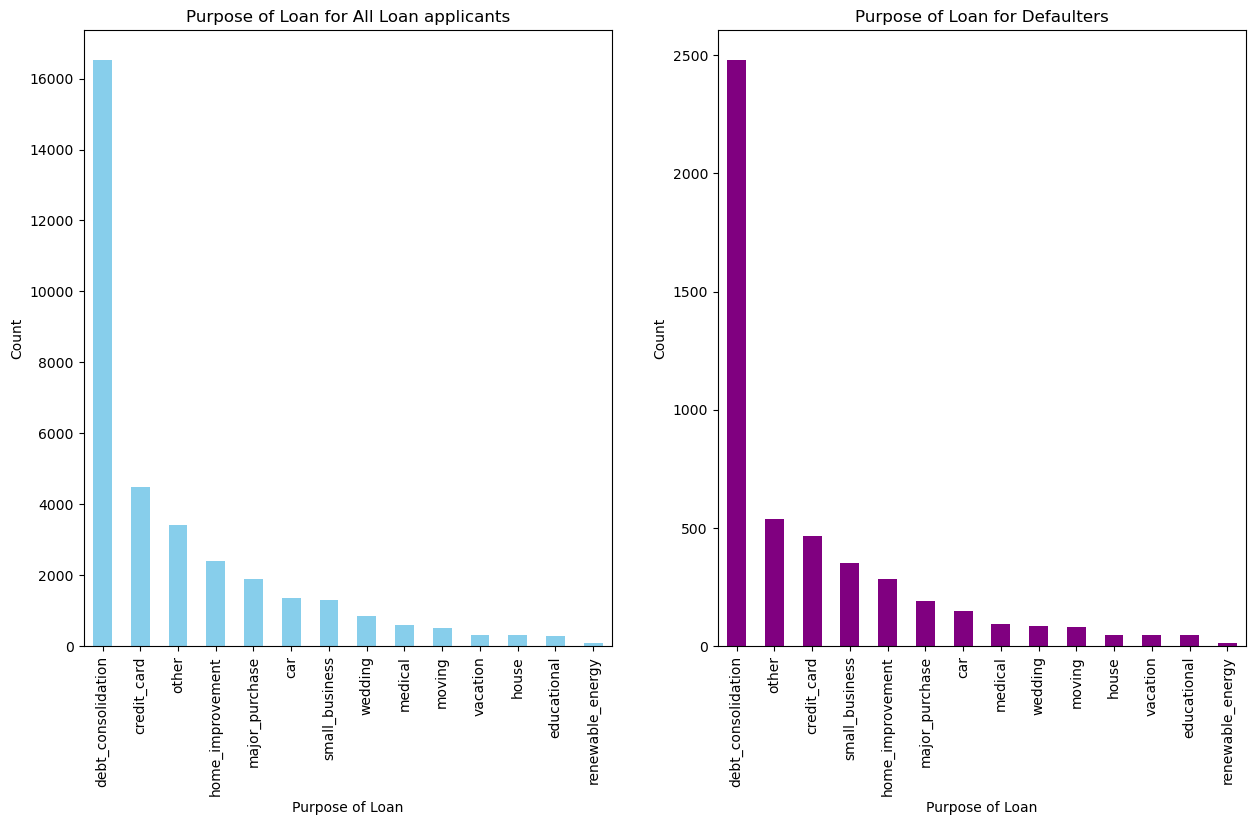

In [80]:
# Create a 1x2 grid of subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Get the value counts for all loan applicants
value_counts = new_data['purpose'].value_counts()

# Plot the bar chart for all loan applicants
value_counts.plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Purpose of Loan for All Loan applicants')
axs[0].set_xlabel('Purpose of Loan')
axs[0].set_ylabel('Count')

# Get the value counts for defaulters

value_counts = new_data_defaulters['purpose'].value_counts()

# Plot the bar chart for defaulters 
value_counts.plot.bar(ax=axs[1], color='purple')
axs[1].set_title('Purpose of Loan for Defaulters')
axs[1].set_xlabel('Purpose of Loan')
axs[1].set_ylabel('Count')


In [81]:
##### Observation - 1. Maximum Loan applicants took laoan for debt consolidation 
#####               2. Maximum defaulters also took laoan for debt consolidation 

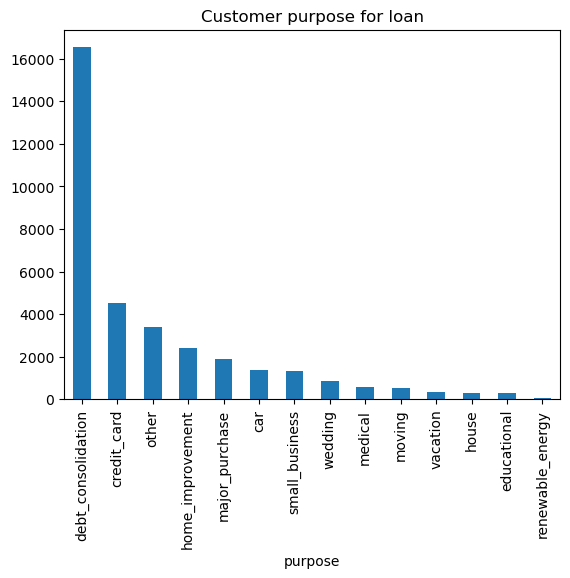

In [82]:
#Plotting bar chart to see the customers with different purpose.
new_data['purpose'].value_counts().plot.bar()
plt.title("Customer purpose for loan")
plt.show()

##### Observation - Highest number of loan application have debt_consolidation purpose for taking loan 

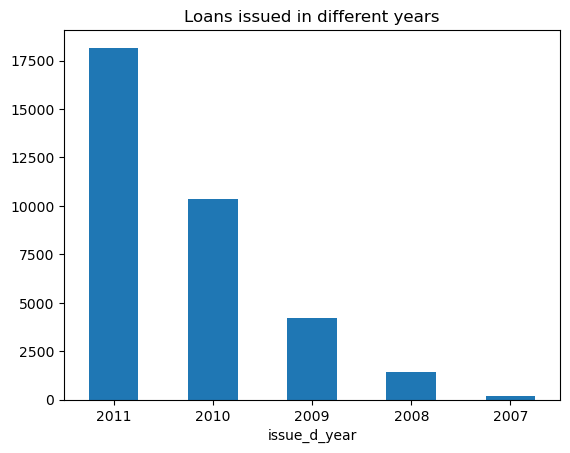

In [83]:
#Plotting bar chart to see the customers who has been issued in different years.
# Define colors for each bar
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue']
new_data['issue_d_year'].value_counts().plot.bar(colors)
plt.title("Loans issued in different years")
plt.xticks(rotation=0)
plt.show()

##### Observation - There is an increasing trend in the loans approved from year 2007 to 2011 

Text(0, 0.5, 'Count')

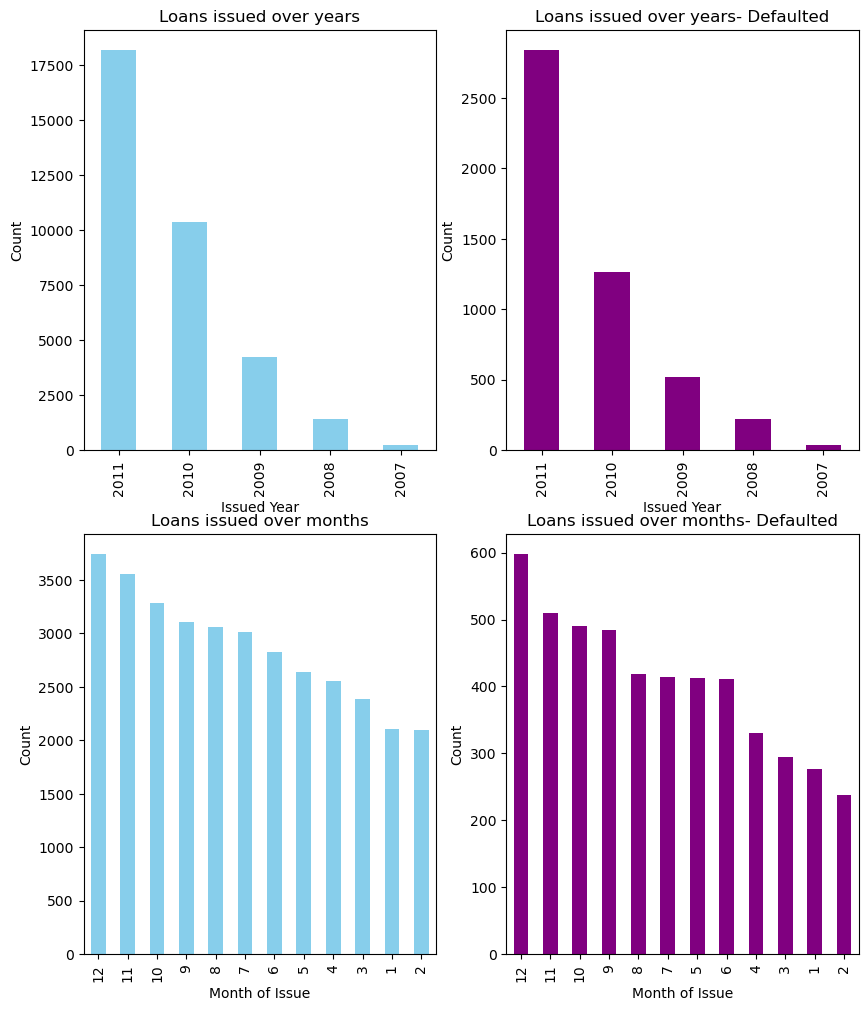

In [84]:
# Create a 1x2 grid of subplots with shared y-axis
fig, axs = plt.subplots(2, 2, figsize=(10, 12))

# Sub Plot 1 - Loan Issued over years
value_counts = new_data['issue_d_year'].value_counts()

# Plot the bar chart for all loan applicants
value_counts.plot.bar(ax=axs[0][0], color='skyblue')
axs[0][0].set_title('Loans issued over years')
axs[0][0].set_xlabel('Issued Year')
axs[0][0].set_ylabel('Count')

# Sub Plot 2 -  Defaulted loans issued over years - Defaulted

value_counts = new_data_defaulters['issue_d_year'].value_counts()

# Plot the bar chart for defaulters 
value_counts.plot.bar(ax=axs[0][1], color='purple')
axs[0][1].set_title('Loans issued over years- Defaulted')
axs[0][1].set_xlabel('Issued Year')
axs[0][1].set_ylabel('Count')

# Sub Plot 3 - Loan Issued over months
value_counts = new_data['issue_d_month'].value_counts()

# Plot the bar chart for all loan applicants
value_counts.plot.bar(ax=axs[1][0], color='skyblue')
axs[1][0].set_title('Loans issued over months')
axs[1][0].set_xlabel('Month of Issue')
axs[1][0].set_ylabel('Count')

# Sub Plot 4 - Loan Issued over months - Defaulted

value_counts = new_data_defaulters['issue_d_month'].value_counts()

# Plot the bar chart for defaulters 
value_counts.plot.bar(ax=axs[1][1], color='purple')
axs[1][1].set_title('Loans issued over months- Defaulted')
axs[1][1].set_xlabel('Month of Issue')
axs[1][1].set_ylabel('Count')

##### Observation
##### There is an increasing trend in loans issued over the years . 2011 has most loans issued.
##### 2011 has most number of loans defaulted compared to previous year
##### December has most number of loans issued 
##### Maximum defaults of loans are at the end of the year

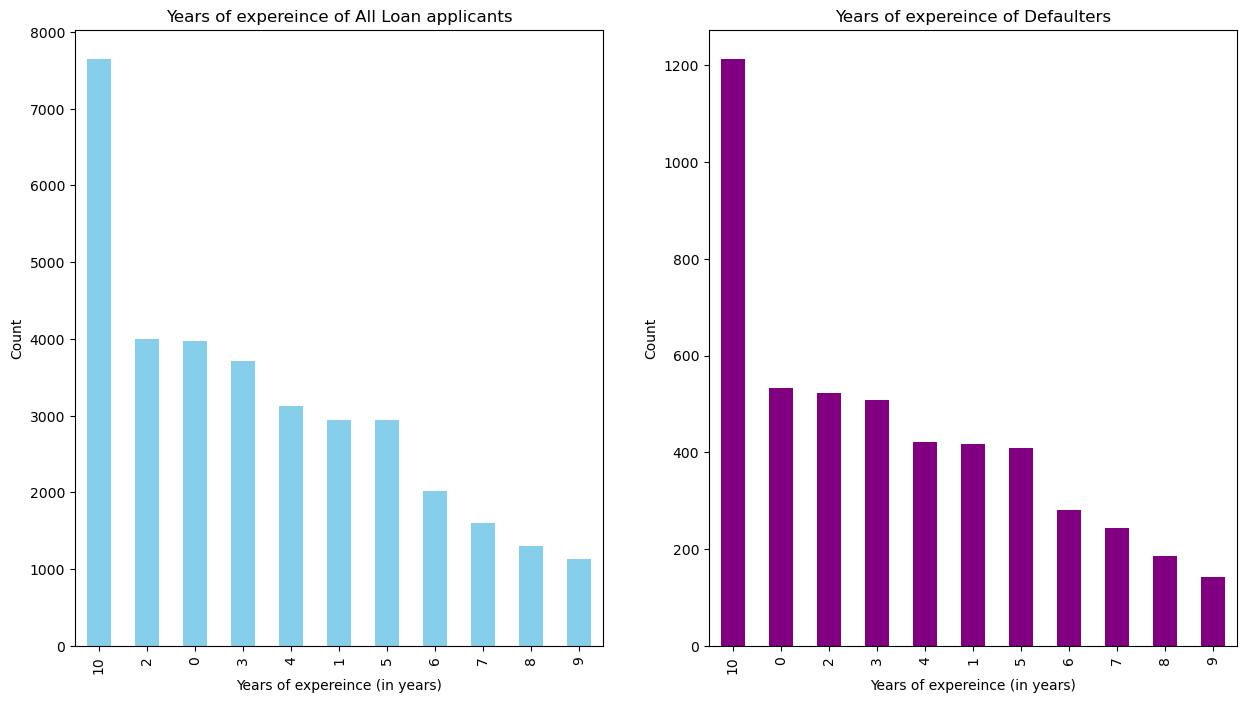

In [85]:
# Create a 1x2 grid of subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Get the value counts
value_counts = new_data['tenure'].value_counts()

# Plot the bar chart for all loan applicants
value_counts.plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Years of expereince of All Loan applicants')
axs[0].set_xlabel('Years of expereince (in years)')
axs[0].set_ylabel('Count')

# Get the value counts

value_counts = new_data_defaulters['tenure'].value_counts()

# Plot the bar chart for defaulters 
value_counts.plot.bar(ax=axs[1], color='purple')
axs[1].set_title('Years of expereince of Defaulters')
axs[1].set_xlabel('Years of expereince (in years)')
axs[1].set_ylabel('Count')
plt.show()

##### Observation - 1. Maximum Loan applicants have 10+ years of job experience 
#####               2. Maximum defaulters also have 10+ years of job experience

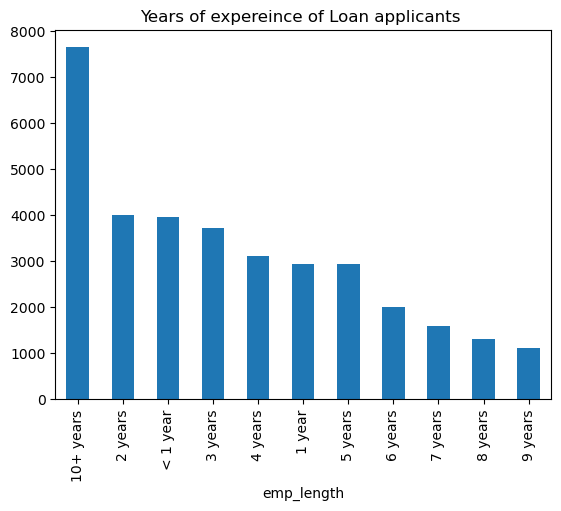

In [86]:
#Plotting bar chart to see the customers Years of expereince of Loan applicants.
# Define colors for each bar
#colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue']
new_data['emp_length'].value_counts().plot.bar('b')
plt.title("Years of expereince of Loan applicants ")
plt.show()


##### Observation - Maximum Loan applicants have 10+ years of job experience 

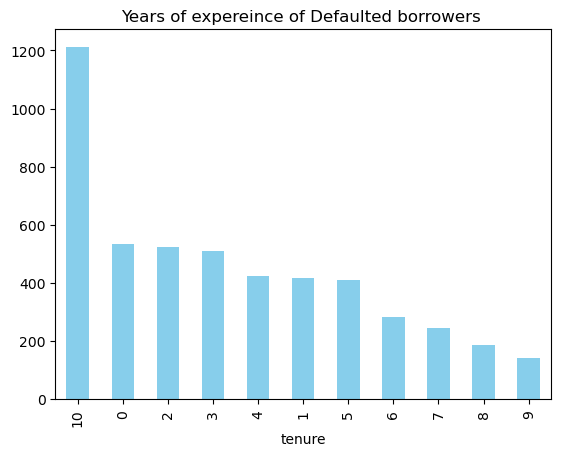

In [87]:
# Plotting bar chart to see the Years of expereince of the Defaulted customers.
# Define colors for each bar

new_data_defaulters['tenure'].value_counts().plot.bar(color='skyblue')
plt.title("Years of expereince of Defaulted borrowers ")
plt.show()

##### Observation - Most of the defaulters have 10+ years of job experience 

##### 5.2. Numerical Variables

In [88]:
#num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","emp_length","annual_inc","dti","open_acc","revol_bal","revol_util","total_acc","total_pymnt",
#          "total_pymnt_inv","total_rec_int"]

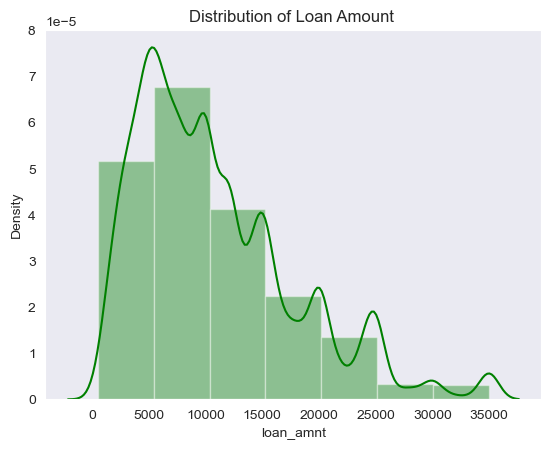

In [89]:

sns.set_style("dark")
sns.distplot(new_data.loan_amnt, bins=7, color='g')
plt.title("Distribution of Loan Amount ",fontsize=12) 
plt.show()


##### From above distibution plot,
##### Observation - Max Loan amount is dispersed in 5000-10000 range and very few loans are for higher amounts 

Text(0.5, 1.0, 'Distribution of Funded Amount by Investors')

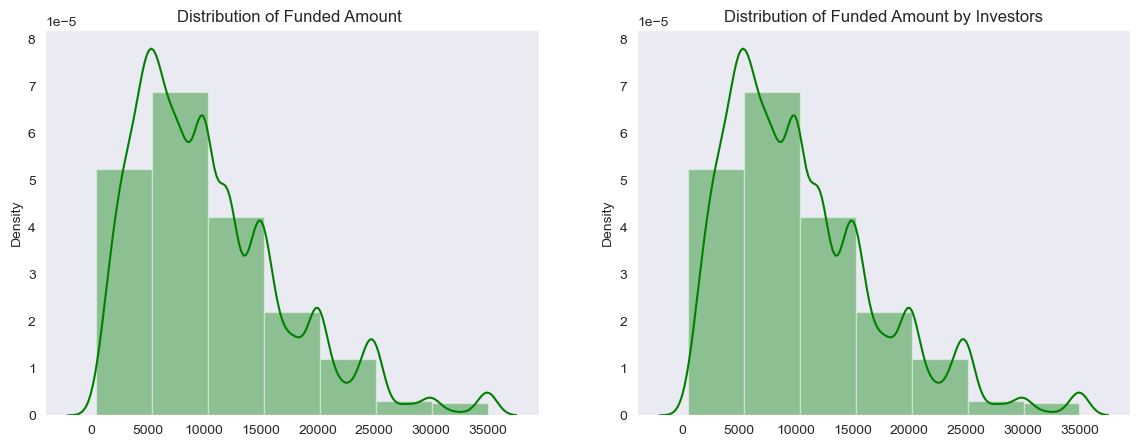

In [90]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.set_style("dark")

sns.distplot(ax=ax[0],x=new_data.funded_amnt, bins=7, color='g')
ax[0].set_title("Distribution of Funded Amount ")

sns.distplot(ax=ax[1],x=new_data.funded_amnt, bins=7, color='g')
ax[1].set_title("Distribution of Funded Amount by Investors")


#####  Observation - Loan amount and Funded amount have similar distribution. 
#####  Also Funded amount and Funded amount from investors have similar distribution.  
#####  Hence the enitre loan amount is mostly funded.

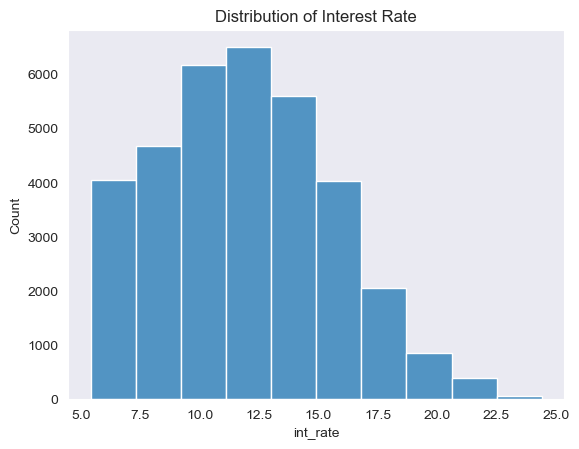

In [91]:
sns.histplot(data=new_data, x='int_rate',bins=10)
plt.title("Distribution of Interest Rate")
plt.show()

#####  Observation - Most of the approved loans incurred an maximum interest range of 10-12.5% interest


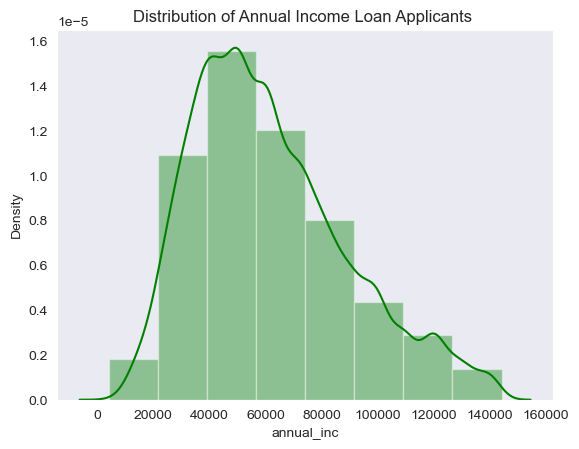

In [92]:
sns.set_style("dark")
sns.distplot(new_data.annual_inc, bins=8, color='g')
plt.title("Distribution of Annual Income Loan Applicants ",fontsize=12) 
plt.show()

#####  Observation - People with mid-range average income (40000-60000) has applied for maximum loans 


Text(0.5, 1.0, 'Distribution of Revolving Credit Utilization')

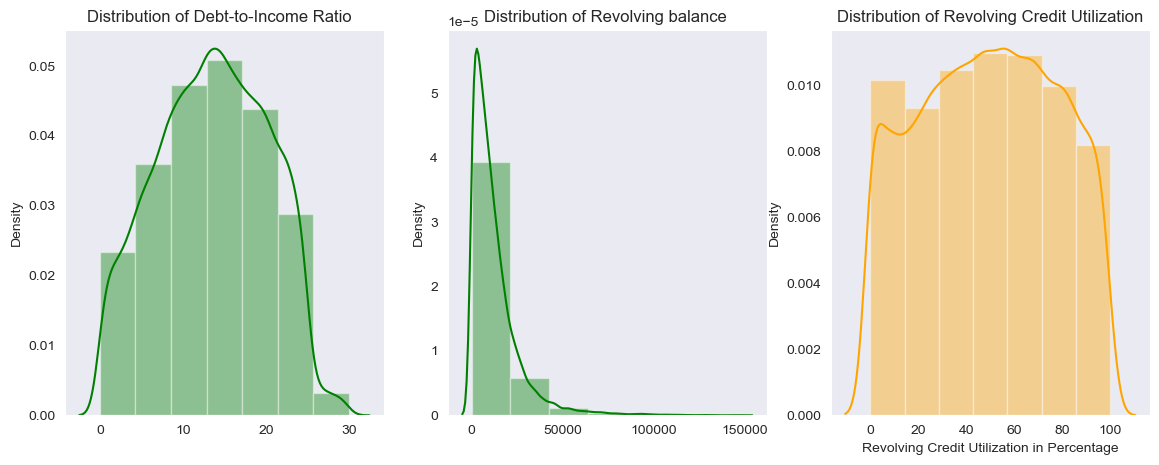

In [93]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
sns.set_style("dark")

sns.distplot(ax=ax[0],x=new_data.dti, bins=7, color='g')
ax[0].set_title("Distribution of Debt-to-Income Ratio  ")

sns.distplot(ax=ax[1],x=new_data.revol_bal, bins=7, color='g')
ax[1].set_title("Distribution of Revolving balance ")

sns.distplot(ax=ax[2],x=new_data.revol_util, bins=7, color='orange')
ax[2].set_xlabel('Revolving Credit Utilization in Percentage')
ax[2].set_title("Distribution of Revolving Credit Utilization")

##### Observation - Most of the Loan applicants are having an average debt-to-income ratio [10-20]
####              - Majority of Loan applicants are having low revolving balance
####              - Majority of Loan applicants have utilized their revolving credits.

#### Segmented Univariate Analysis

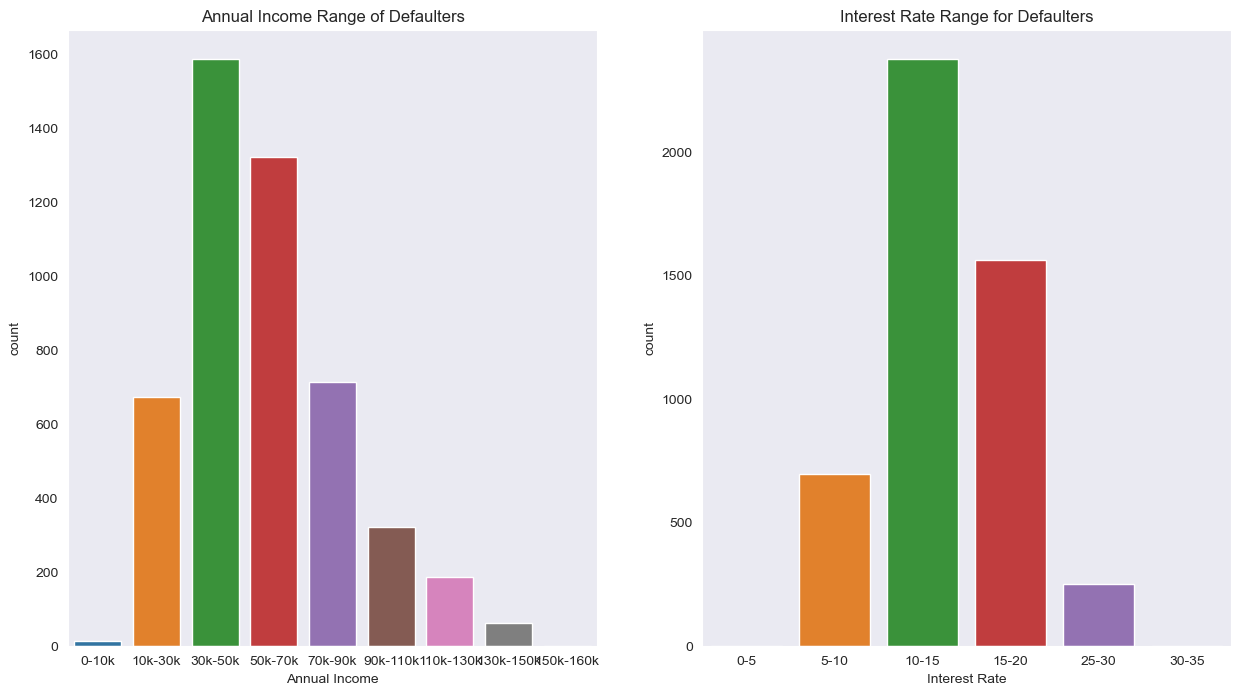

In [94]:
# Analysing Annual Income Range for defaulters and Interest rate range for defaulters 
# Create a new column that defines the segments for 'Interest rate' 
new_data_defaulters['Interest_Rate_Segment'] = pd.cut(new_data['int_rate'], bins=[0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','25-30','30-35'])
# Create a new column that defines the segments for 'Interest rate' 
new_data_defaulters['annual_inc_segment'] = pd.cut(new_data['annual_inc'], bins=[0, 10000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 160000], 
                                        labels=['0-10k', '10k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-110k', '110k-130k', '130k-150k', '150k-160k'])


# figure
fig, ax = plt.subplots(1,2,figsize = (15,8))

# subplot1 - count plot for visualising distribution across Annual Income Segments consdidering data with ONLY Defaulters (loan_status = 'charged off")
sns.countplot(ax=ax[0],x='annual_inc_segment', data=new_data_defaulters)
# Set label for subplot
ax[0].set_xlabel('Annual Income')
# Set Title for subplot
ax[0].set_title('Annual Income Range of Defaulters')

# subplot2 - count plot for visualizing the distribution across segments consdidering data with ONLY Defaulters (loan_status = 'charged off")

# subplot the count plot for data with loan_status = 'charged off" for defaulters
sns.countplot(ax=ax[1],x='Interest_Rate_Segment', data=new_data_defaulters)
# Set label for subplot
ax[1].set_xlabel('Interest Rate')
# Set Title for subplot
ax[1].set_title('Interest Rate Range for Defaulters')

plt.show()

##### Observation - Maximum defaulters were in the 30-50K Income Range and 15-20% Interest Loan range

#### Bivariate Analysis

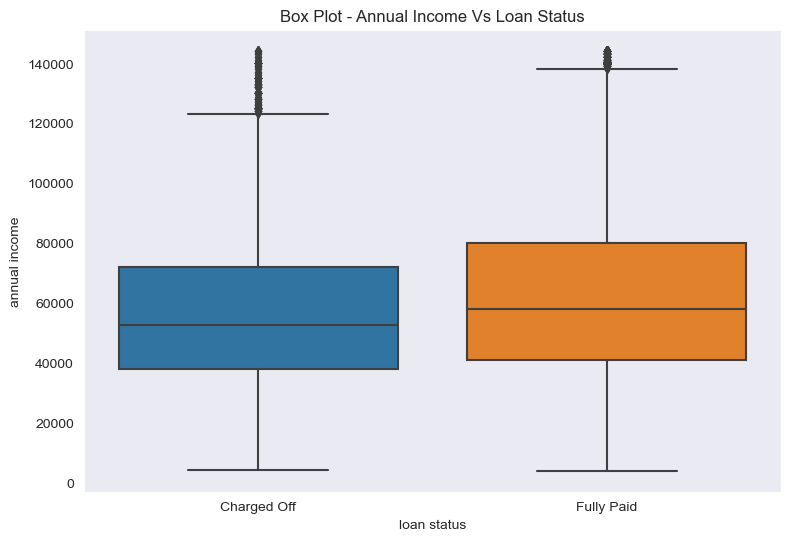

In [95]:
# loan_status vs annual_inc [Categorical vs Numerical]

plt.figure(figsize=[9,6])
sns.boxplot(x=new_data['loan_status'], y=new_data['annual_inc'])
plt.xlabel('loan status')  # x-axis label
plt.ylabel('annual income')     # y-axis label

# Add a title
plt.title('Box Plot - Annual Income Vs Loan Status')

# Show the plot
plt.show()


##### Observation :
##### Higher the Annual Income , Less number of defaulters    


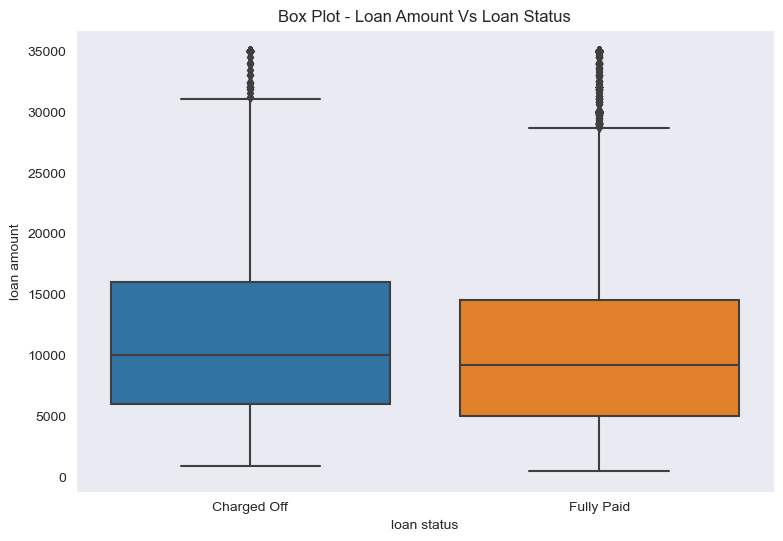

In [96]:
# loan_status vs Loan amount [Categorical vs Numerical]

plt.figure(figsize=[9,6])
sns.boxplot(y=new_data['loan_amnt'], x=new_data['loan_status'])
plt.xlabel('loan status')  # x-axis label
plt.ylabel('loan amount')     # y-axis label

# Add a title
plt.title('Box Plot - Loan Amount Vs Loan Status')

# Show the plot
plt.show()


##### Observation : Higher the loan amount, more borrowers defaulted

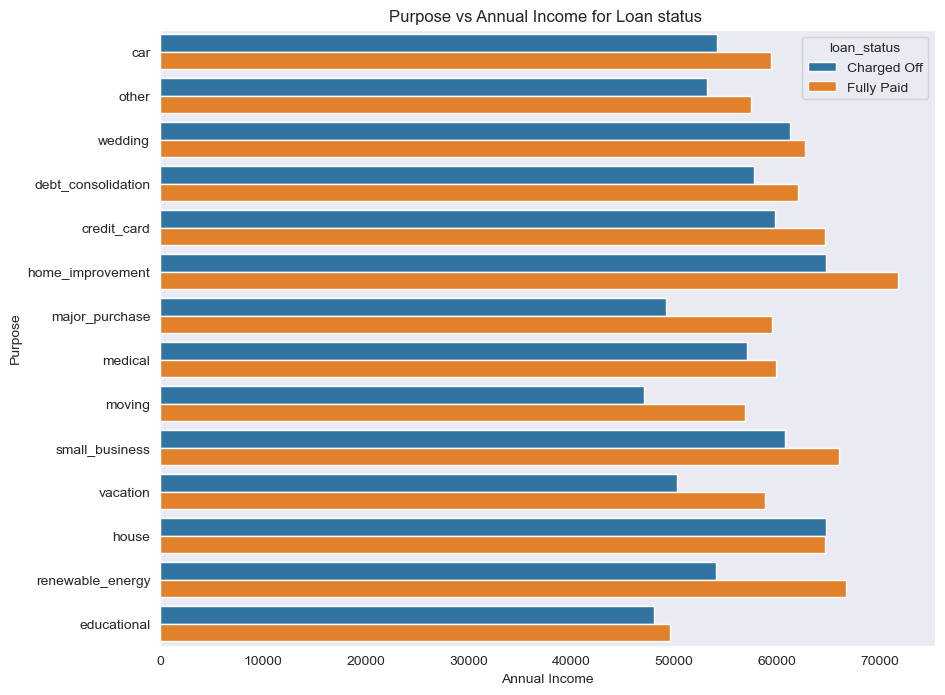

In [97]:
# Purpose Vs Annual Income [Categorical vs Numerical]
plt.figure(figsize=(10, 8)) # width, height

sns.barplot(data =new_data,x='annual_inc', y='purpose', hue ='loan_status',ci = None)
plt.title('Purpose vs Annual Income for Loan status ')
plt.xlabel('Annual Income')
plt.ylabel('Purpose')

plt.show()

#### Observation 
##### - Loan applicants with higher income availed loans for Home improvement , Renewable Energy,Small Bussiness, House 
##### - Defaulters with high income (> 50K) availed loans for Home improvement, House, Wedding 
##### - In univariate analysis , higher number of loans were availed for Debt consolidation purpose. These borrowers did not have high income.

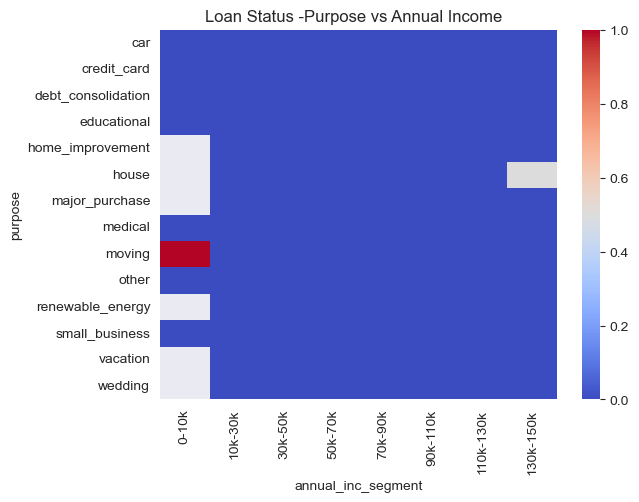

In [98]:
# Plotting heat map for Purpose vs Annual Income based on Laon status

fig, ax = plt.subplots()
ax.set_title("Loan Status -Purpose vs Annual Income  ")

new_data['annual_inc_segment'] = pd.cut(new_data['annual_inc'], bins=[0, 10000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 160000], 
                                        labels=['0-10k', '10k-30k', '30k-50k', '50k-70k', '70k-90k', '90k-110k', '110k-130k', '130k-150k', '150k-160k'])

new_data['loan_status_dnum'] = new_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

res = pd.pivot_table(data=new_data, values='loan_status_dnum', index='purpose', columns='annual_inc_segment',aggfunc=np.median) 
#colormap = sns.color_palette("Greens") 
sns.heatmap(res,cmap='coolwarm')
plt.show()

##### Observation
##### -Loan applicants in LowerIncome Range mostly availed loans for wedding, vacation, renewable energy, moving, major_purcahse, house and home improvement and have 50% chance of defaulting. Highest default is for loans taken for moving purpose
##### -- Highest default in lower income is movin
##### -- Loan applicantinth Higher income tend to defau ONLYlt with the purpose of house.¶

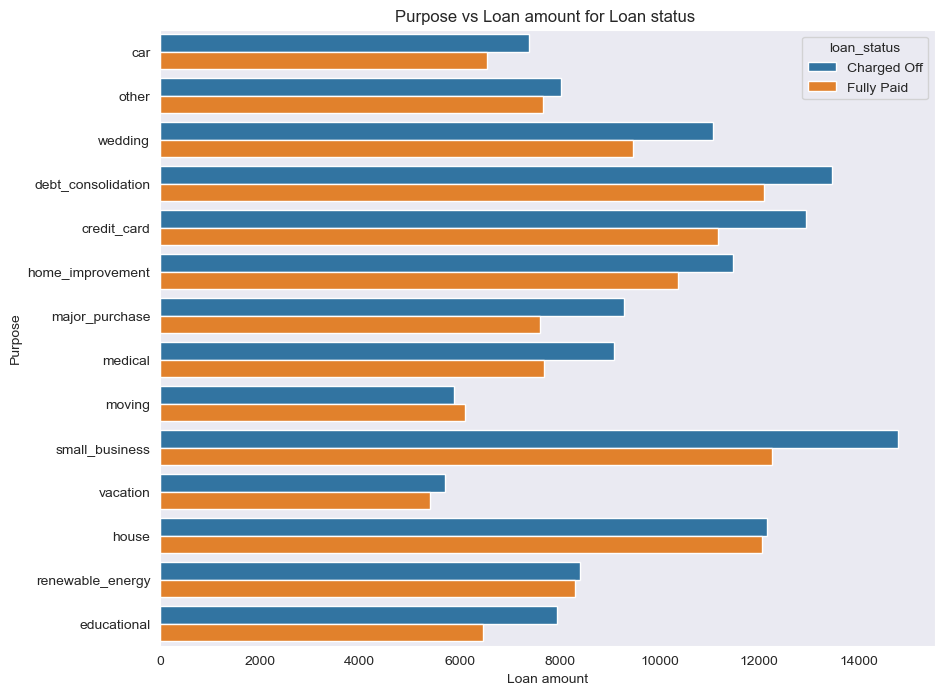

In [99]:

# Purpose Vs Loan Amount [Categorical vs Numerical]

plt.figure(figsize=(10, 8))
sns.barplot(data =new_data,x='loan_amnt', y='purpose', hue ='loan_status',ci = None)
plt.title('Purpose vs Loan amount for Loan status ')
plt.xlabel('Loan amount')
plt.ylabel('Purpose')

plt.show()

##### Observation - Defaulters are maximum in Higher Loan amounts taken for small bussiness
##### Higher loan amounts are approved for SMall bussiness, Debt Consolidation,House, Credit Card, Debit consolidation , Home improvement
##### Small bussiness have the highest loan approval and maximum defaulters   


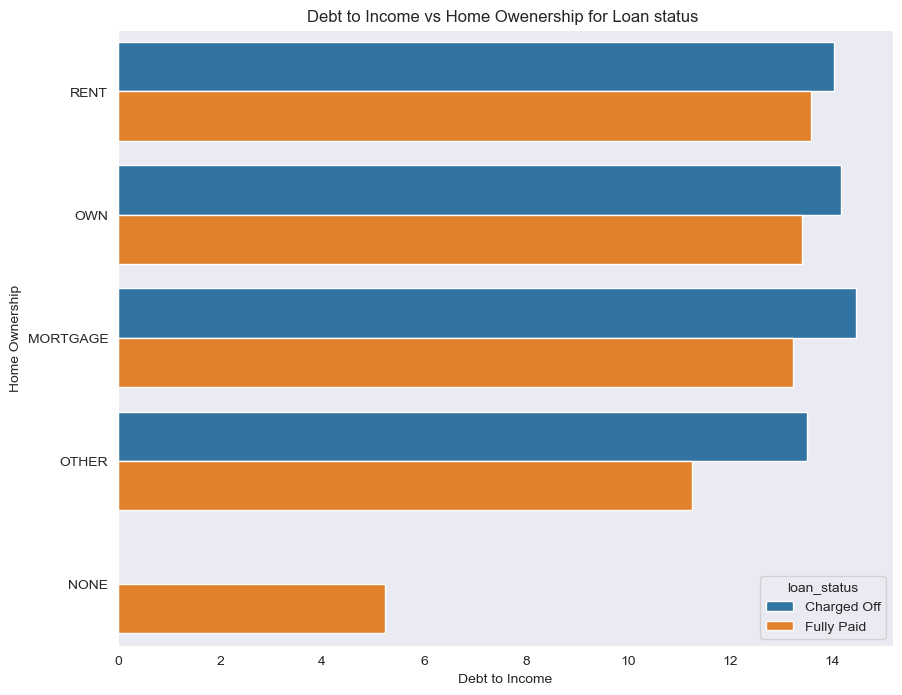

In [100]:
# Debt to Income Ratio Vs Home Ownership [Categorical vs Numerical]

plt.figure(figsize=(10, 8))
sns.barplot(data =new_data,x='dti', y='home_ownership', hue ='loan_status',ci = None)
plt.title('Debt to Income vs Home Owenership for Loan status ')
plt.xlabel('Debt to Income')
plt.ylabel('Home Ownership')

plt.show()

##### Observation - Defaulters are higher in almost all categories of home ownership as their debt to income is high.

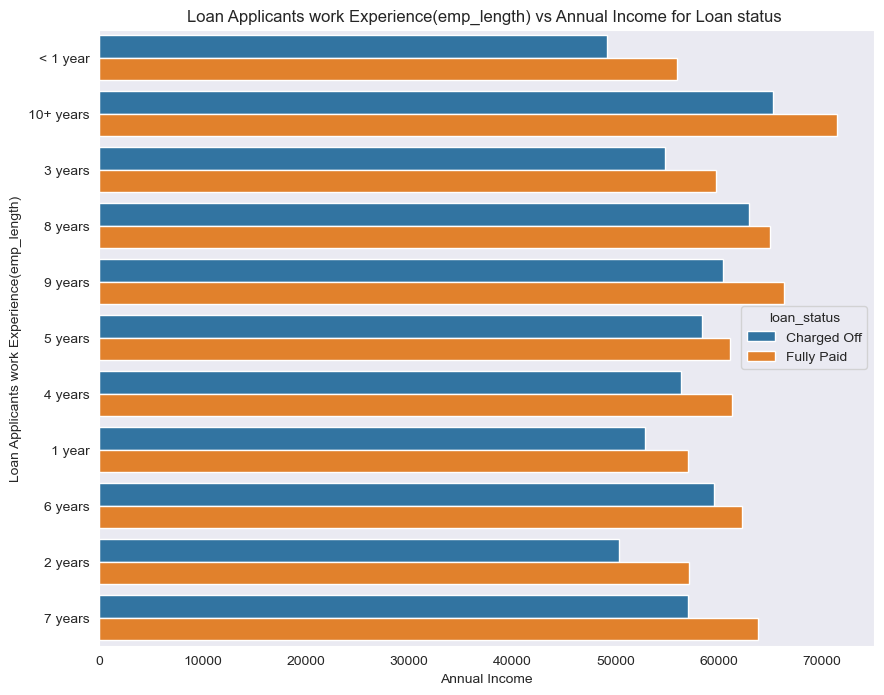

In [101]:
#Loan Applicant's work Experience(emp_length) Vs Annual Income [Categorical vs Numerical]
plt.figure(figsize=(10, 8)) # width, height

sns.barplot(data =new_data,x='annual_inc', y='emp_length', hue ='loan_status',ci = None)
plt.title('Loan Applicants work Experience(emp_length) vs Annual Income for Loan status ')
plt.xlabel('Annual Income')
plt.ylabel('Loan Applicants work Experience(emp_length)')

plt.show()

##### Observation - Defaulters are higher who has high income and more work experience.

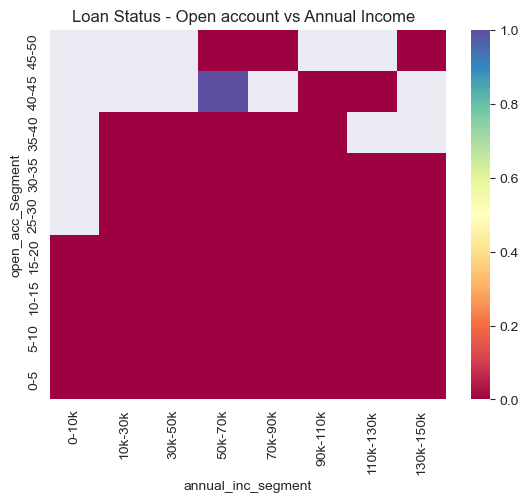

In [102]:
# Plotting heat map for Open account vs Annual Income based on Laon status

fig, ax = plt.subplots()
ax.set_title("Loan Status - Open account vs Annual Income  ")

new_data['open_acc_Segment'] = pd.cut(new_data['open_acc'], bins=[0,5,10,15,20,25,30,35,40,45], labels=['0-5','5-10','10-15','15-20','25-30','30-35','35-40','40-45','45-50'])

#plt.figure(figsize = (10,10))

res = pd.pivot_table(data=new_data, values='loan_status_dnum', index='open_acc_Segment', columns='annual_inc_segment',aggfunc=np.median) 

res_sorted = res.sort_index(ascending=False)  # sorting the index 'open_acc_Segment'
colormap = sns.color_palette("Greens") 
sns.heatmap(res_sorted,cmap='Spectral')
plt.show()

##### Observation:
##### Loan applicants of Mid Income Range 50K-110K , usually have less open accounts . But if they have more open accounts (40-45) ,
##### they are  MOST likely candidates to default 

##### Loan applicants of lower income range (<50K) mostly tend to have more open accounts , they have a 50% chance to default

##### Loan applicants of Higher income range( > 110K)-very few tend to open accounts. But if they have more open accounts (>35) they
##### have 50% likely chances to default


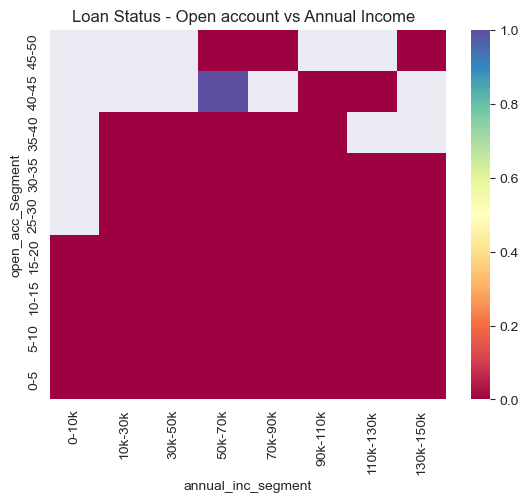

In [103]:
# Plotting heat map for Open account vs Annual Income based on Laon status

fig, ax = plt.subplots()
ax.set_title("Loan Status - Open account vs Annual Income  ")

new_data['open_acc_Segment'] = pd.cut(new_data['open_acc'], bins=[0,5,10,15,20,25,30,35,40,45], labels=['0-5','5-10','10-15','15-20','25-30','30-35','35-40','40-45','45-50'])

#plt.figure(figsize = (10,10))

res = pd.pivot_table(data=new_data, values='loan_status_dnum', index='open_acc_Segment', columns='annual_inc_segment',aggfunc=np.median) # x='installment', y='annual_inc_p'

res_sorted = res.sort_index(ascending=False)  # sorting the index 'open_acc_Segment'
colormap = sns.color_palette("Greens") 
sns.heatmap(res_sorted,cmap='Spectral')
plt.show()

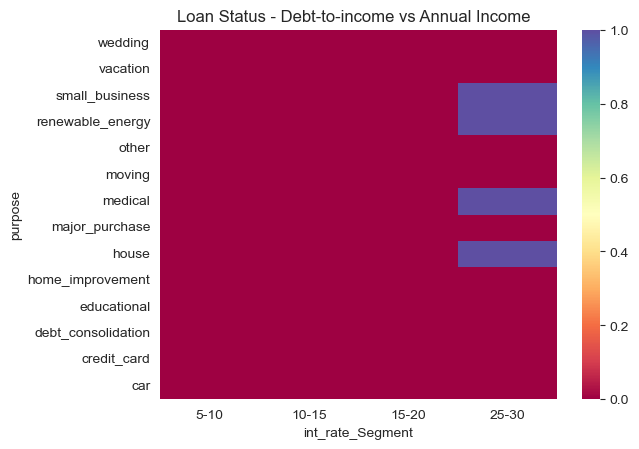

In [104]:
# Plotting heat map for Open account vs Annual Income based on Laon status

new_data['int_rate_Segment'] = pd.cut(new_data['int_rate'], bins=[0,5,10,15,20,25,30,35,40], labels=['0-5','5-10','10-15','15-20','25-30','30-35','35-40','40-45'])

fig, ax = plt.subplots()
ax.set_title("Loan Status - Debt-to-income vs Annual Income  ")

#plt.figure(figsize = (10,10))

res = pd.pivot_table(data=new_data, values='loan_status_dnum', index='purpose', columns='int_rate_Segment',aggfunc=np.median) # x='installment', y='annual_inc_p'


res_sorted = res.sort_index(ascending=False)  # sorting the index 'open_acc_Segment'

sns.heatmap(res_sorted,cmap='Spectral')
plt.show()

##### Observation
##### For Loans given on Small business, renewable energy , medical, house with max interest rate , High chances of defaulting 

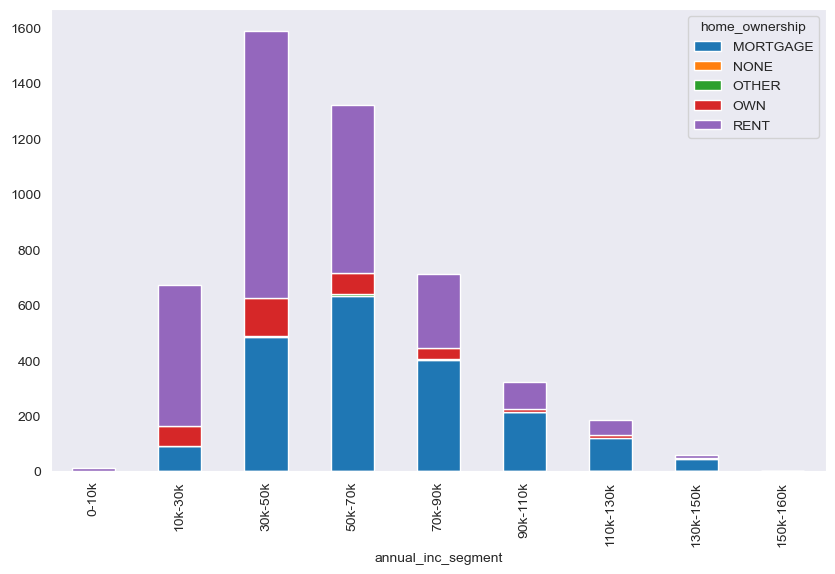

In [105]:
# PLotting Stacked bar chart for Purpose vs Home ownership vs Annula income
purpose_of_loan=pd.pivot_table(data=new_data, values="loan_status_dnum", index="annual_inc_segment", columns="home_ownership", aggfunc=sum)
##Plot the stacked bar chart.
purpose_of_loan.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

######  Observation
######  Most of the defaulters were in the rented category in home ownership and Income Range 30K-50K, 50K-70K

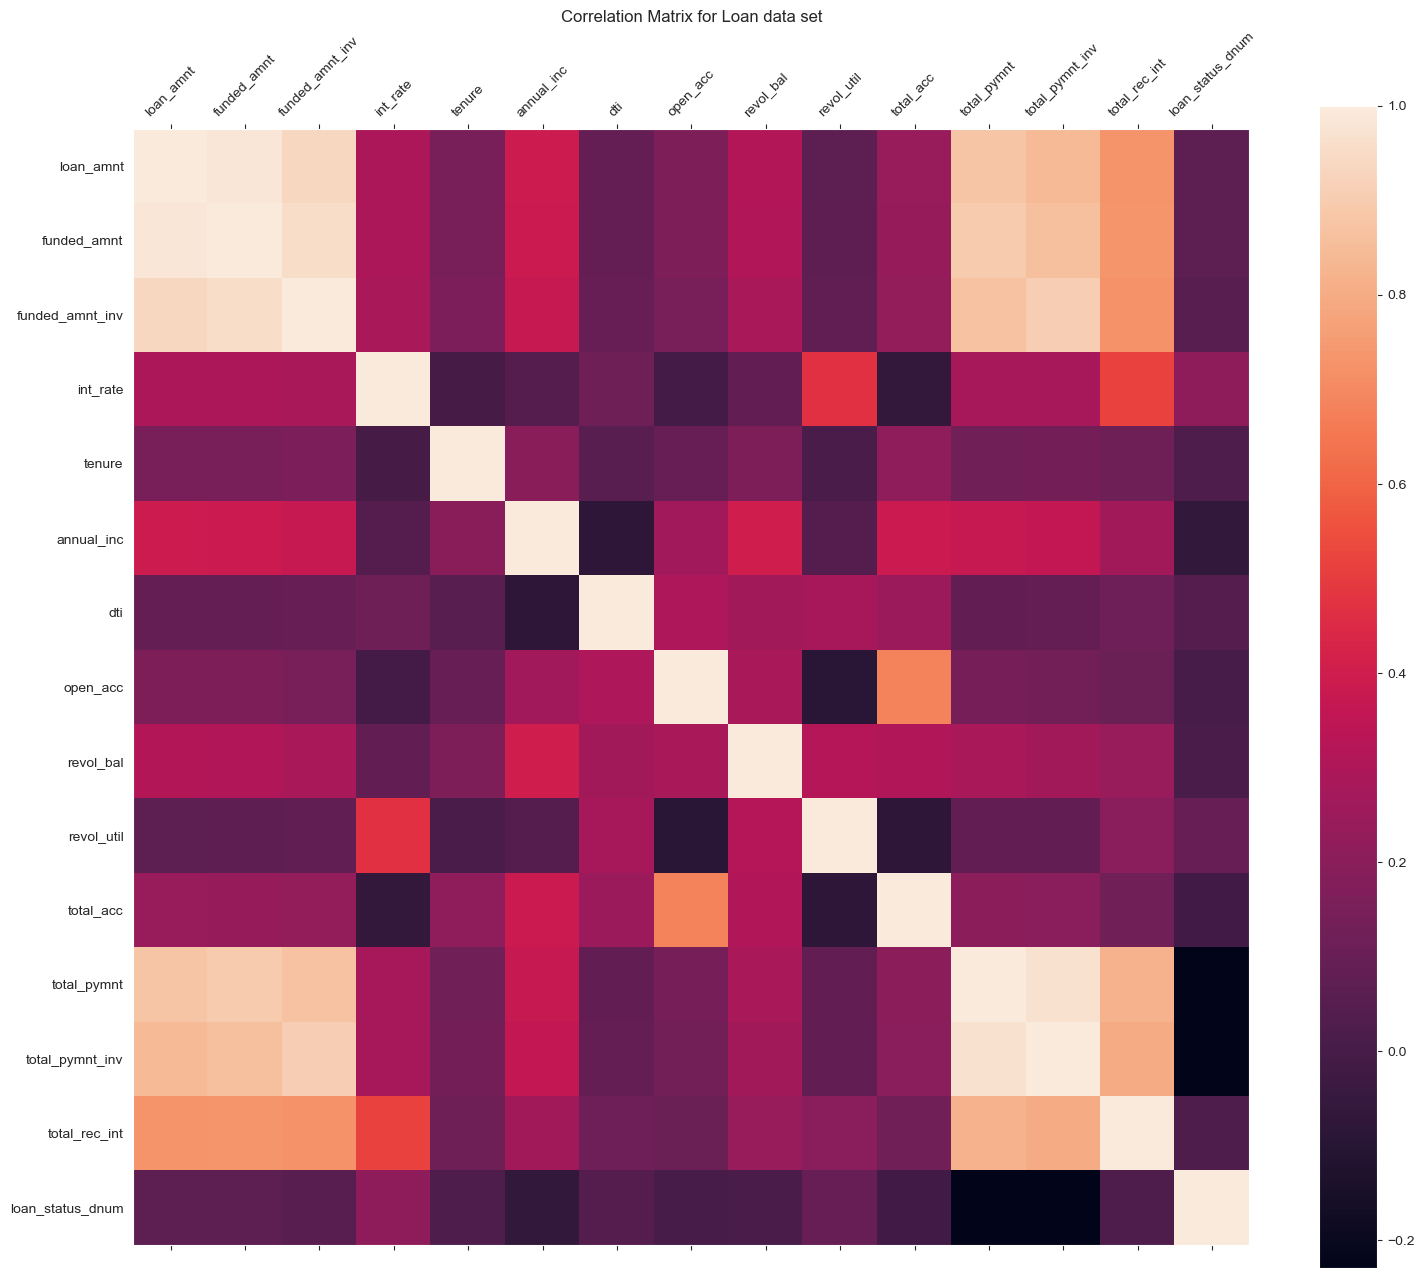

In [106]:
# Correlation map for the entire data - all numerical columns
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","tenure","annual_inc","dti","open_acc","revol_bal","revol_util","total_acc","total_pymnt",
          "total_pymnt_inv","total_rec_int","loan_status_dnum"]

new_data_numerical = new_data[num_cols] 

f = plt.figure(figsize=(18, 15))
plt.matshow(new_data_numerical.corr(),fignum=f.number)
fignum=f.number
x_ticks = [0,1, 2,3, 4,5,6,7,8,9,10,11,12,13,14]

# Customize x-axis ticks
plt.xticks(x_ticks,labels=num_cols,rotation =45)  # Set specific tick positions and labels


# Customize y-axis ticks
plt.yticks(x_ticks,labels=num_cols)  # Set specific tick positions and labels

plt.title('Correlation Matrix for Loan data set', fontsize=12);

plt.colorbar()  
plt.show()

##### Loan amount , funcded amount and funded amount from investors highly correlated
##### Total payment , Total payment investors are highly correlated
##### Least correlation between these sets - dti & annual income, open account & revolv_util,
##### Decent correlation between these sets - revolv_util & int_rate, revolv_bal & annual income, annual income & laon amount